<a href="https://colab.research.google.com/github/IntenseSunlight/Alpaca-Lora-Colab/blob/main/RunAlpacaLora_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Note
This notebook is a reimplementation of the Google Colab notebook by:  
`deepdiver/Alpaca-LoRA-Serve/notebooks/alpaca_lora_in_colab.ipynb`  


This model provides an implentation of the Alpaca-Lora, using GPU instances.  This does not use the full quantization for CPU use only.

Original work of others, as described in: 
[Github: Alpaca-Lora-Serve](https://github.com/deep-diver/Alpaca-LoRA-Serve/blob/main/notebooks/alpaca_lora_in_colab.ipynb)

To use, run all sections as indicated with the play button: play-button.png.    
At the end, a weblink will be given.  You can click this link to start the chat browser

In [ ]:
#@title Step 0. For mobile devices, Keep this tab alive to prevent Colab from disconnecting you (use play button to activate) { display-mode: "form" }

# From: https://github.com/henk717/KoboldAI

%%html
<b>Press play on the music player to keep the tab alive (Uses only 13MB of data)</b><br/>
<audio src="https://henk.tech/colabkobold/silence.m4a" controls>

# Step 1:  
Check GPU's Memory Capacity
By running nvidia-smi command, you can find out the GPU's memory capacity on the current system.

With the standard GPU instance(___T4___) which is free, you can run 7B and 13B models. With the premium GPU instance(___A100 40GB___) which is paid with the compute unit that you own, you can even run 30B model! Choose the instance at the menu:  
`Runtime -> Change runtime type -> Hardware accelerator (GPU) -> GPU class (Standard or Premium)`

**Note**: This may already be set and you don't need to change it

Change the runtime like this, if necessary:<br>
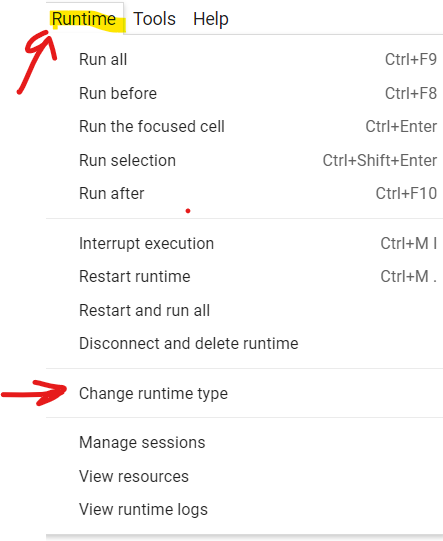
---

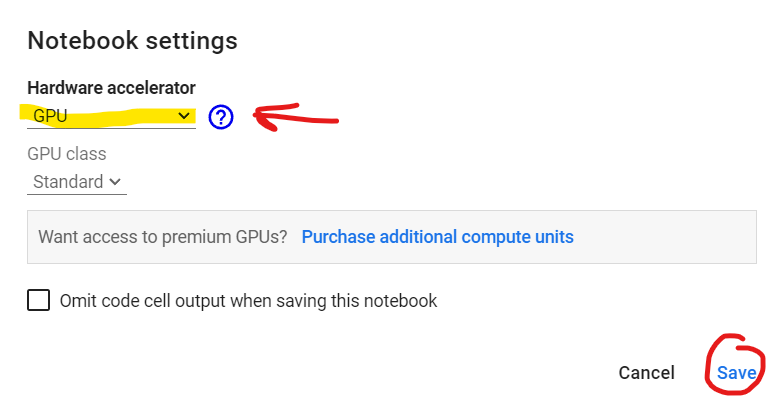
---

# Step 2: 
Check the access to the GPU.  When you run this cell below, it should give a similar output with from the `nvida-smi` prompt.  This will indicate that step 1 in setting the GPU was performed correctly.  If it gives you an error, it was probably not set or the incorrect `TPU` option was selected.

In [ ]:
# Run this cell
!nvidia-smi

In [ ]:
#@title Step 3: Choose Model { run: "auto", display-mode: "form" }
#@markdown Note: Here, you need to choose a model architecture (7B or 13B) for the base model <br>  
#@markdown After that, the finetuned model (Lora-adaptation) must be chosen<br><br>
#@markdown **Hint**:  choosing the 7B configuration will get you started faster. <br>  
#@markdown (30B models are only availabe for Colab-Pro instances with 40 GB VRAM, standard free Colab can only run 7B & 13B models)

base_model = 'decapoda-research/llama-7b-hf' #@param ["decapoda-research/llama-7b-hf", "decapoda-research/llama-13b-hf", "decapoda-research/llama-30b-hf"]
finetuned_model = 'tloen/alpaca-lora-7b' #@param ["tloen/alpaca-lora-7b", "chansung/alpaca-lora-13b", "chansung/koalpaca-lora-13b", "chansung/alpaca-lora-30b"]

#@markdown Press the run button after you have made the model choices

print(f"Setting model was successful:\nbase_model = '{base_model}'\nfinetuned_model = '{finetuned_model}'")

# Step 4:  Run setup

In [ ]:
# Run this cell
!git clone https://github.com/deep-diver/Alpaca-LoRA-Serve.git
%cd Alpaca-LoRA-Serve
!pip install -r requirements.txt
print("\n\nFinished Step 2 Successfully")

# Step 5: Run model
- Note, this will take some time depending on the model size.  The end result will be a link which from which you can access the chat browser, as shown below. This may take some time to load, and the link will be at the very end, When it is complete, choose the second link as shown below

Example:
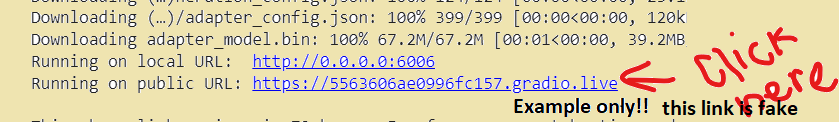

In [ ]:
# Run this cell
!python app.py --base_url $base_model --ft_ckpt_url $finetuned_model --share